# 1. Importing libraries

In [1]:
import cv2
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns

import pickle

# 2. Loading dataset

In [2]:
df_test_letter = pd.read_csv("./data/emnist/emnist-letters-test.csv", header=None)
df_test_letter.tail()

FileNotFoundError: File b'./data/emnist/emnist-letters-test.csv' does not exist

In [3]:
df_train_letter = pd.read_csv("./data/emnist/emnist-letters-train.csv", header=None)
df_train_letter.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
88795,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88798,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88799,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Split data to training set and test set

### a) split training data

In [4]:
X_train_letter = df_train_letter.drop(0, axis = 1).values
y_train_letter = df_train_letter[0].values

### b) split test data

In [5]:
X_test_letter = df_test_letter.drop(0, axis = 1).values
y_test_letter = df_test_letter[0].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split( 
    X_train_letter, y_train_letter, test_size=0.2, random_state=13)

# 4. Visualization

In [7]:
letters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
df_letter = pd.DataFrame(columns=['letter'], data=letters)

##### Visualize sub_training_set

In [8]:
df_sub_train = pd.DataFrame(columns=['label'], data = y_train)
df_sub_train = df_sub_train.groupby('label').size()
df_sub_train.index = df_sub_train.index-1
df_sub_train = pd.concat([df_letter, df_sub_train], axis=1)
df_sub_train.head()

,letter,0
0,A,2716
1,B,2671
2,C,2713
3,D,2696
4,E,2776


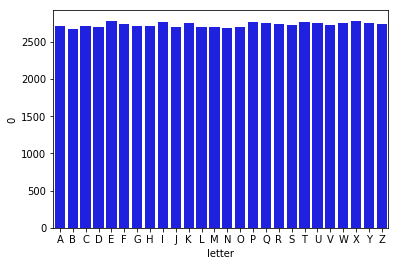

In [9]:
# sns.set(style="whitegrid")
ax = sns.barplot(x="letter", y=df_sub_train[0], data=df_sub_train, color="Blue")

##### Visualize sub_training_set

In [10]:
df_sub_test = pd.DataFrame(columns=['label'], data = y_test)
df_sub_test = df_sub_test.groupby('label').size()
df_sub_test.index = df_sub_test.index-1
df_sub_test = pd.concat([df_letter, df_sub_test], axis=1)
df_sub_test.head()

,letter,0
0,A,680
1,B,725
2,C,706
3,D,702
4,E,661


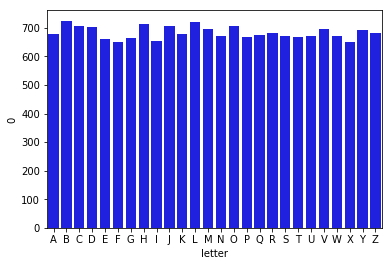

In [11]:
ax = sns.barplot(x="letter", y=df_sub_test[0], data=df_sub_test, color="Blue")

# 5. Evaluation

### Training

##### EMNIST Letters 

In [31]:
%%time
neigh_letter = KNeighborsClassifier(n_neighbors=11)
neigh_letter.fit(X_train, y_train) 

Wall time: 24 s


In [32]:
neigh_letter

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [33]:
pickle_out = open('./model/neigh_letter.p', 'wb')
pickle.dump(neigh_letter, pickle_out)
pickle_out.close()
# with open('data/train_points.p', 'rb') as f:
#     X = pickle.load(f)

In [34]:
with open('./model/neigh_letter.p', 'rb') as f:
    neigh = pickle.load(f)

### Predicting

In [35]:
%%time
y_pre= neigh.predict(X_test) # 0:Overcast, 2:Mild
print(y_pre)

[ 5 23 12 ... 20 21  3]
Wall time: 32min 43s


In [36]:
# %%time
# newpoint = np.array(X_test[4000]).reshape(1,-1)
# y_pre= neigh.predict(newpoint) # 0:Overcast, 2:Mild

# print(newpoint.shape)

### Accuracy

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pre))

Accuracy: 0.8372184684684685


In [38]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           1       0.82      0.79      0.80       680
           2       0.94      0.77      0.85       725
           3       0.80      0.95      0.87       706
           4       0.93      0.79      0.85       702
           5       0.87      0.88      0.87       661
           6       0.91      0.83      0.87       652
           7       0.86      0.62      0.72       665
           8       0.83      0.89      0.86       712
           9       0.60      0.76      0.67       655
          10       0.83      0.87      0.85       706
          11       0.93      0.82      0.87       677
          12       0.58      0.71      0.64       720
          13       0.98      0.92      0.95       697
          14       0.82      0.90      0.86       673
          15       0.75      0.98      0.85       706
          16       0.82      0.88      0.85       667
          17       0.79      0.63      0.70       675
          18       0.80    

In [39]:
df_cm1 = pd.DataFrame(confusion_matrix(y_test, y_pre), index = [i for i in range(1,27)],
                  columns = [i for i in range(1, 27)])
df_cm1.columns = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
df_cm1.index = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
df_cm1

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,534,0,5,5,7,4,5,15,2,2,...,8,3,0,4,8,0,0,0,1,7
B,5,560,14,6,16,0,2,29,3,2,...,2,1,7,3,0,1,0,0,0,3
C,1,0,672,0,11,1,0,0,3,0,...,0,5,0,0,2,1,1,0,0,0
D,9,6,3,555,0,0,0,0,12,26,...,0,1,1,4,8,3,0,2,1,5
E,2,1,44,0,579,11,0,1,1,0,...,0,6,2,2,1,0,0,0,0,2
F,0,0,2,0,0,539,1,1,11,2,...,0,13,1,25,0,0,0,1,0,0
G,18,9,37,3,6,1,410,5,5,14,...,86,0,21,7,3,1,2,1,5,0
H,1,4,2,5,0,1,1,631,3,0,...,0,4,0,8,3,0,1,4,0,0
I,0,0,0,0,0,0,0,1,499,19,...,0,1,1,6,1,0,0,0,0,9
J,0,0,0,8,2,0,0,2,27,612,...,0,1,14,14,4,3,0,0,0,0


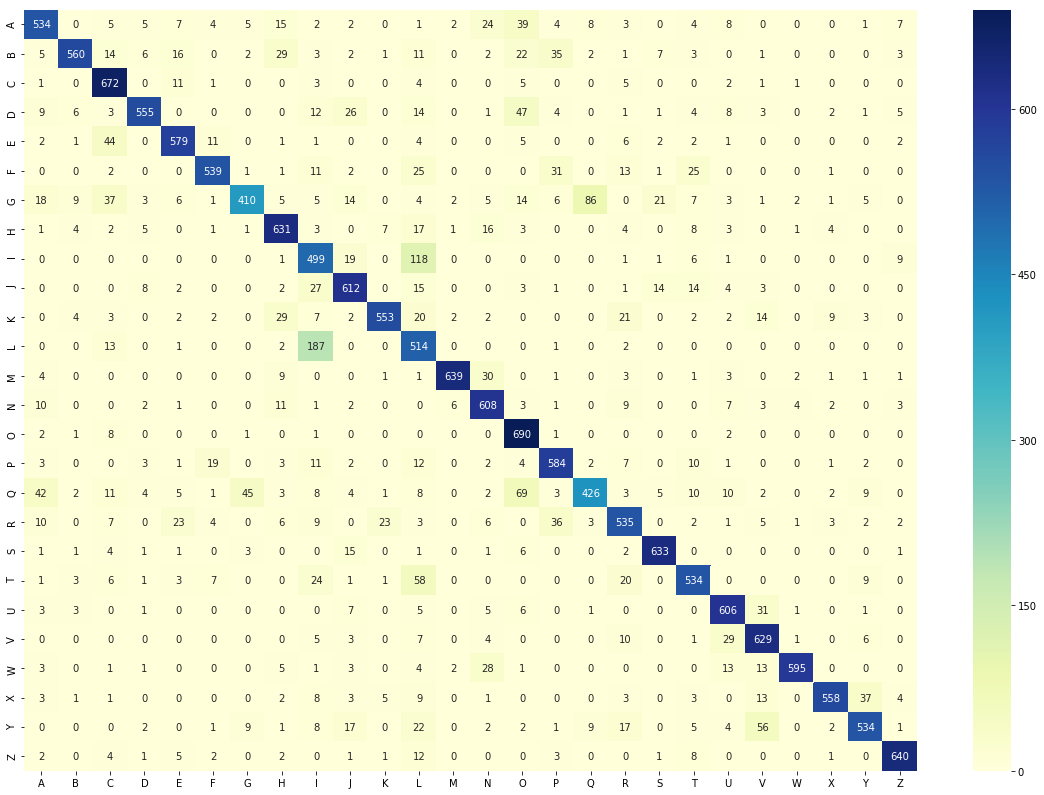

In [40]:
plt.figure(figsize = (20,14))
sns_map = sns.heatmap(df_cm1,cmap="YlGnBu", annot=True, fmt="d")
# sns_map.figure.savefig('confusion_matrix.png')

# 6. Final Evaluation

### Training

##### EMNIST Letters 

In [21]:
%%time
neigh_letter_final = KNeighborsClassifier(n_neighbors=11)
neigh_letter_final.fit(X_train_letter, y_train_letter) 

Wall time: 36.8 s


In [22]:
pickle_out = open('./model/neigh_letter_k11_final.p', 'wb')
pickle.dump(neigh_letter_final, pickle_out)
pickle_out.close()
# with open('data/train_points.p', 'rb') as f:
#     X = pickle.load(f)

In [23]:
with open('./model/neigh_letter_k11_final.p', 'rb') as f:
    neigh = pickle.load(f)

### Predicting

In [24]:
%%time
y_pre_final= neigh.predict(X_test_letter) # 0:Overcast, 2:Mild
print(y_pre)

[ 5 23 12 ... 20 21  3]
Wall time: 29min 51s


In [25]:
# %%time
# newpoint = np.array(X_test[4000]).reshape(1,-1)
# y_pre= neigh.predict(newpoint) # 0:Overcast, 2:Mild

# print(newpoint.shape)

### Accuracy

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test_letter, y_pre_final))

Accuracy: 0.8331756756756756


In [27]:
print(classification_report(y_test_letter, y_pre_final))

              precision    recall  f1-score   support

           1       0.81      0.84      0.83       800
           2       0.95      0.80      0.87       800
           3       0.84      0.95      0.89       800
           4       0.96      0.80      0.87       800
           5       0.89      0.89      0.89       800
           6       0.92      0.81      0.86       800
           7       0.89      0.61      0.72       800
           8       0.85      0.88      0.86       800
           9       0.66      0.74      0.70       800
          10       0.90      0.87      0.88       800
          11       0.95      0.82      0.88       800
          12       0.65      0.74      0.69       800
          13       0.98      0.94      0.96       800
          14       0.89      0.90      0.90       800
          15       0.76      0.98      0.86       800
          16       0.85      0.91      0.88       800
          17       0.80      0.65      0.72       800
          18       0.90    

C:\Users\ASUS\Anaconda3\envs\thanhdanh\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [28]:
df_cm_final = pd.DataFrame(confusion_matrix(y_test_letter, y_pre_final), index = [i for i in range(1,27)],
                  columns = [i for i in range(1, 27)])
df_cm_final.columns = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
df_cm_final.index = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
df_cm_final

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,674,0,5,5,4,2,4,18,3,2,...,5,1,0,1,2,0,1,0,0,7
B,4,642,9,5,24,3,2,29,6,2,...,0,1,6,1,1,0,0,0,0,12
C,0,0,760,1,17,1,0,0,3,0,...,0,4,1,0,3,0,0,0,0,0
D,8,9,1,636,0,1,0,1,9,23,...,0,1,2,1,4,2,1,0,0,3
E,3,1,41,0,711,19,0,1,3,0,...,1,3,2,1,1,0,0,0,0,1
F,0,0,0,0,1,644,0,0,13,2,...,2,26,4,36,0,0,0,1,1,0
G,26,14,43,2,10,4,490,2,8,20,...,120,1,18,0,5,2,1,2,11,0
H,6,6,0,4,0,0,0,702,3,0,...,0,2,0,3,8,2,2,0,0,0
I,0,0,2,0,1,0,1,0,590,12,...,0,1,1,6,0,2,0,1,0,6
J,0,1,0,4,0,0,1,0,31,693,...,0,0,13,39,1,2,0,0,1,1


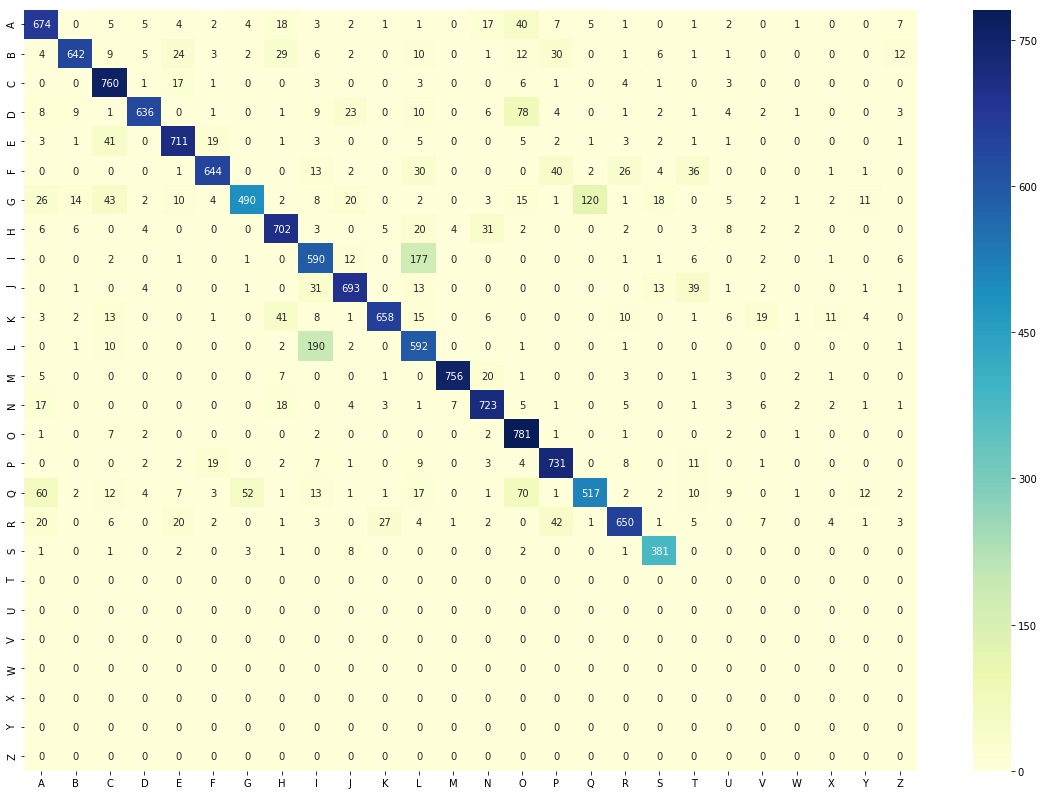

In [29]:
plt.figure(figsize = (20,14))
sns_map = sns.heatmap(df_cm_final,cmap="YlGnBu", annot=True, fmt="d")
# sns_map.figure.savefig('confusion_matrix.png')